# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Loading the "Tesco" supermarket data

In [2]:
df_tesco = pd.read_csv("datasets/All_Data_Tesco.csv")
df_tesco.head()

,supermarket,prices_(£),prices_unit_(£),unit,names,date,category,own_brand
0,Tesco,0.40,0.0,unit,Swan Vesta Matches 1 Box,20240228,household,False
1,Tesco,0.50,0.0,unit,Tesco 200 Cotton Buds,20240228,health_products,True
2,Tesco,0.60,0.0,unit,Tesco Nappy Bags 300,20240228,baby_products,True
3,Tesco,0.75,0.0,unit,Fred & Flo Cotton Buds 300 Pack,20240228,baby_products,True
4,Tesco,0.98,0.0,unit,Stockwell & Co. Sweeteners 850S,20240228,drinks,True


# Modifying the column names and changing the format of the date column

In [3]:
# changing the name of the columns
df_tesco = df_tesco.rename(columns = {'prices_(£)' : 'prices_pounds' , 
                                      'prices_unit_(£)' : 'per_unit_price'})

In [4]:
# Correcting data types: Convert the 'date' column to datetime format
df_tesco['date'] = pd.to_datetime(df_tesco['date'], format='%Y%m%d')

In [5]:
print("The shape of the Tesco dataset is {}".format(df_tesco.shape))

The shape of the Tesco dataset is (1158616, 8)


In [6]:
print("The column names in Tesco dataset - {}".format(df_tesco.columns))

The column names in Tesco dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [7]:
df_tesco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158616 entries, 0 to 1158615
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   supermarket     1158616 non-null  object        
 1   prices_pounds   1158616 non-null  float64       
 2   per_unit_price  1158615 non-null  float64       
 3   unit            1158615 non-null  object        
 4   names           1158616 non-null  object        
 5   date            1158616 non-null  datetime64[ns]
 6   category        1158616 non-null  object        
 7   own_brand       1158616 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 63.0+ MB


# Check for null values

In [8]:
df_tesco.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    1
unit              1
names             0
date              0
category          0
own_brand         0
dtype: int64

In [9]:
# Checking which rows are null
tesco_null = df_tesco[df_tesco.isnull().any(axis=1)]
print(tesco_null)

       supermarket  prices_pounds  per_unit_price unit  \
483945       Tesco            0.0             NaN  NaN   

                                               names       date  \
483945  Twix Multipack Chocolate Bars Biscuits 9x20g 2024-02-08   

             category  own_brand  
483945  food_cupboard      False  


In [10]:
df_tesco.iloc[483945]

supermarket                                              Tesco
prices_pounds                                              0.0
per_unit_price                                             NaN
unit                                                       NaN
names             Twix Multipack Chocolate Bars Biscuits 9x20g
date                                       2024-02-08 00:00:00
category                                         food_cupboard
own_brand                                                False
Name: 483945, dtype: object

In [11]:
rows_starting_with_twix = df_tesco[df_tesco['names'].str.startswith('Twix Multipack Chocolate Bars Biscuits')]
print(rows_starting_with_twix)

        supermarket  prices_pounds  per_unit_price unit  \
8042          Tesco           2.35            13.1   kg   
32548         Tesco           2.35            13.1   kg   
57521         Tesco           2.35            13.1   kg   
81402         Tesco           2.35            13.1   kg   
103822        Tesco           2.35            13.1   kg   
128839        Tesco           2.35            13.1   kg   
152901        Tesco           2.35            13.1   kg   
175812        Tesco           2.35            13.1   kg   
201769        Tesco           2.35            13.1   kg   
236959        Tesco           2.35            13.1   kg   
250474        Tesco           2.35            13.1   kg   
272872        Tesco           2.35            13.1   kg   
295250        Tesco           2.35            13.1   kg   
321029        Tesco           2.35            13.1   kg   
341431        Tesco           2.35            13.1   kg   
363336        Tesco           2.35            13.1   kg 

## Imputing the null value

In [12]:
# Specific row to impute the null value
row_index_tesco = 483945  

# Imputing the values for these specific columns
columns_to_impute_tesco = ['prices_pounds', 'per_unit_price', 'unit']  

# Specify the values to impute
impute_values_tesco = [2.35, 13.1, 'kg']  

for column, value in zip(columns_to_impute_tesco, impute_values_tesco):
    df_tesco.at[row_index_tesco, column] = value

In [13]:
# Checking if the values have been imputed successfully
df_tesco.iloc[483945]

supermarket                                              Tesco
prices_pounds                                             2.35
per_unit_price                                            13.1
unit                                                        kg
names             Twix Multipack Chocolate Bars Biscuits 9x20g
date                                       2024-02-08 00:00:00
category                                         food_cupboard
own_brand                                                False
Name: 483945, dtype: object

## Cross checking if any null values are present after imputing

In [14]:
df_tesco.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64

**The values are successfully imputed!**

There are no other null values present within the dataset

# Visualizations

## Line graph for price trends over time

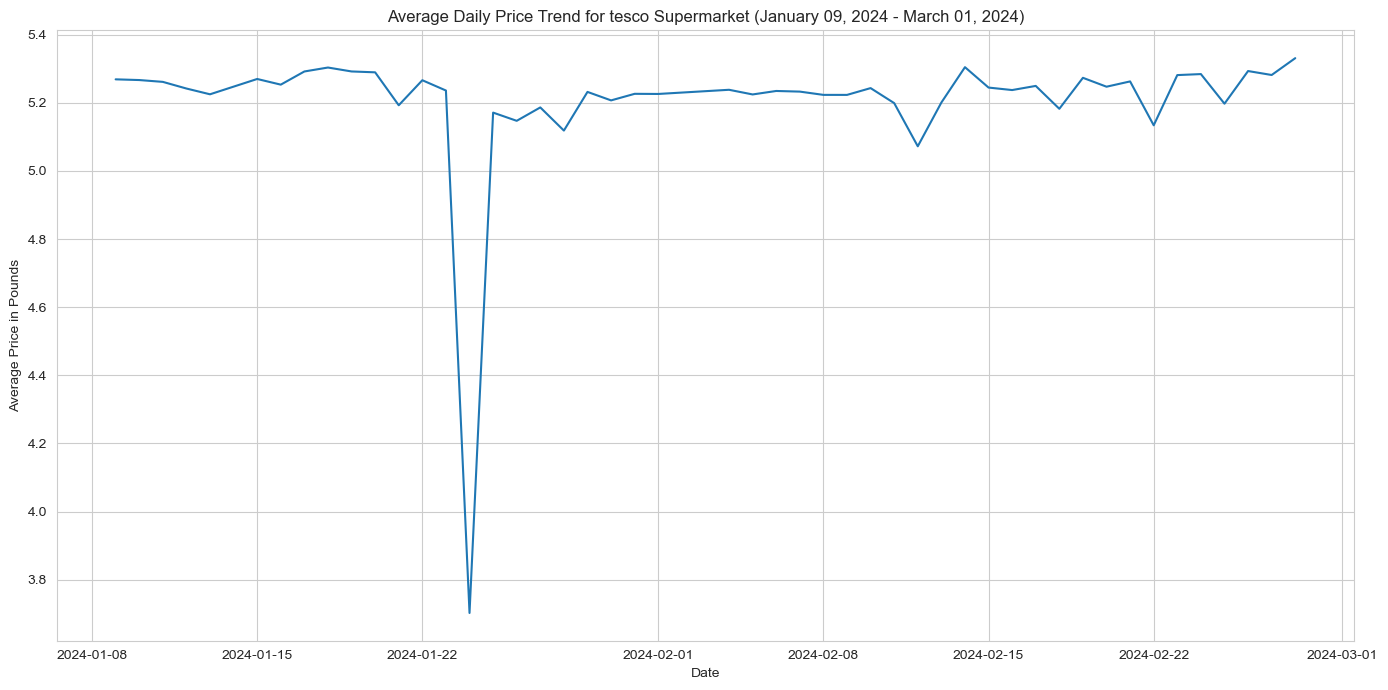

In [15]:
# Line graph
df_tesco['date'] = pd.to_datetime(df_tesco['date']) 
daily_price_trends_tesco = df_tesco.groupby(df_tesco['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize = (14, 7))
sns.lineplot(data = daily_price_trends_tesco, x = 'date', y = 'prices_pounds')
plt.title('Average Daily Price Trend for tesco Supermarket (January 09, 2024 - March 01, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
#plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show()

The observations for the `Tesco` supermarket are -
* There is a price increase from January 9th to January 13th, followed by a decrease until January 17th.
* The price remains relatively stable between January 17th and February 1st, with minor fluctuations.
* There is a slight price increase again from February 1st to February 9th, followed by a decrease on February 11th.

## Overall price distribution using a Histogram

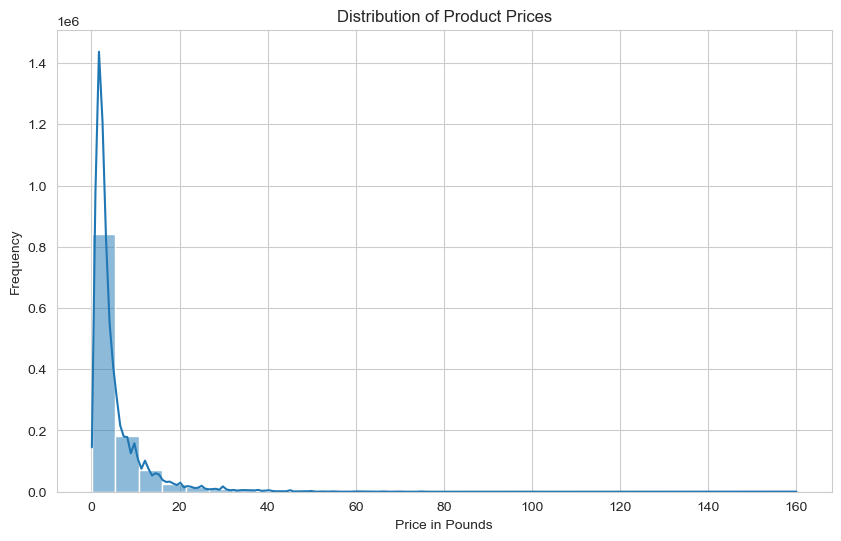

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_tesco['prices_pounds'], 
             bins=30, 
             kde=True)

plt.title('Distribution of Product Prices')
plt.xlabel('Price in Pounds')
plt.ylabel('Frequency')
plt.show()

## Bar chart showing the number of products per category

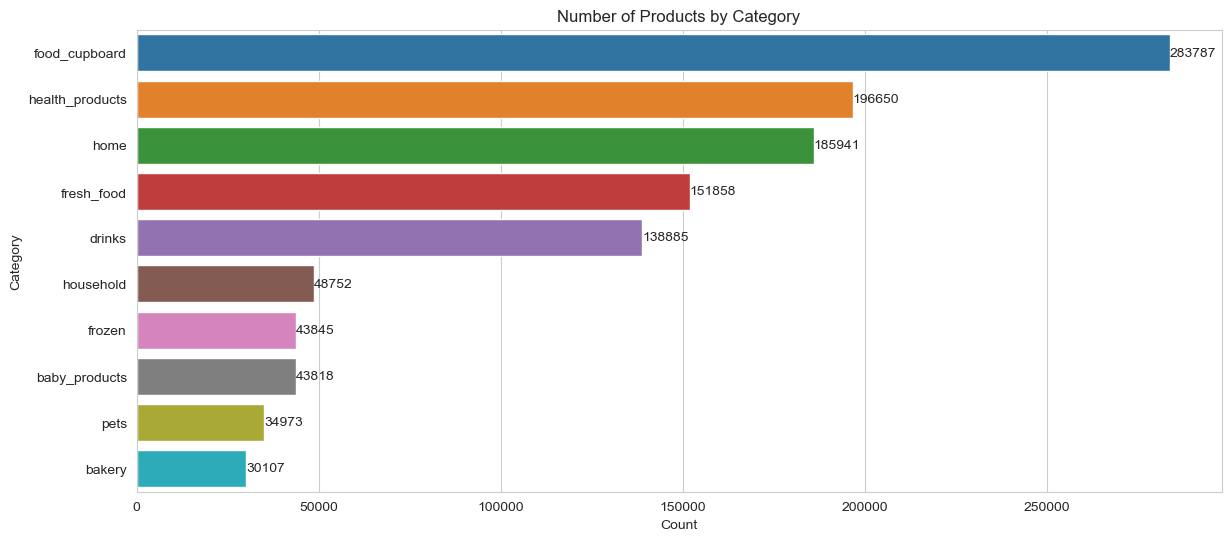

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(y='category', 
              data=df_tesco, 
              order=df_tesco['category'].value_counts().index)

plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')

# Adding annotations
for i, count in enumerate(df_tesco['category'].value_counts()):
    plt.text(count, i, str(count), ha='left', va='center')

plt.show()

## Calculating the average price per category

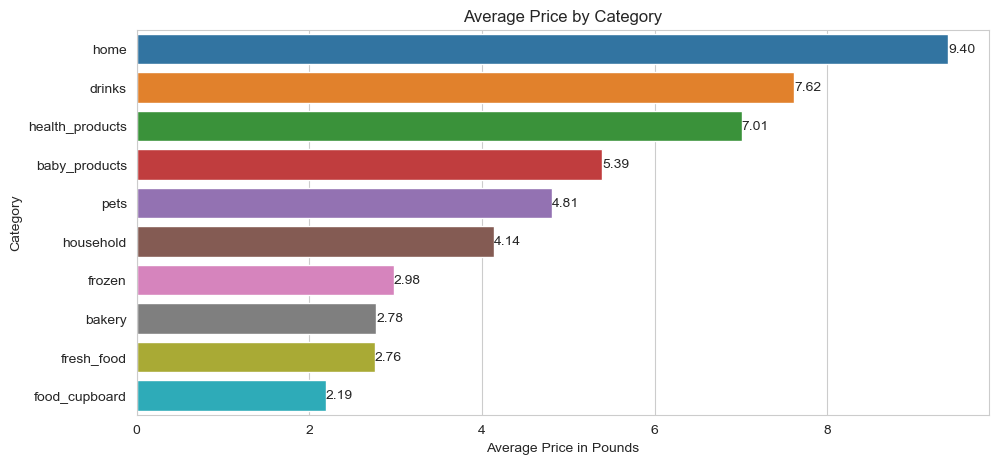

In [18]:
average_price_per_category_tesco = df_tesco.groupby('category')['prices_pounds'].mean().reset_index().sort_values(by='prices_pounds', ascending=False)

# Bar chart showing the average price per category
plt.figure(figsize=(11, 5))
sns.barplot(x='prices_pounds', 
            y='category', 
            data=average_price_per_category_tesco)

plt.title('Average Price by Category')
plt.xlabel('Average Price in Pounds')
plt.ylabel('Category')

# Adding annotations
for i, price in enumerate(average_price_per_category_tesco['prices_pounds']):
    plt.text(price, i, '{:.2f}'.format(price), ha='left', va='center')

plt.show()

The average price for `home` is significantly higher than for any other category followed by `bakery`

## Box plot for distribution of prices for each product category

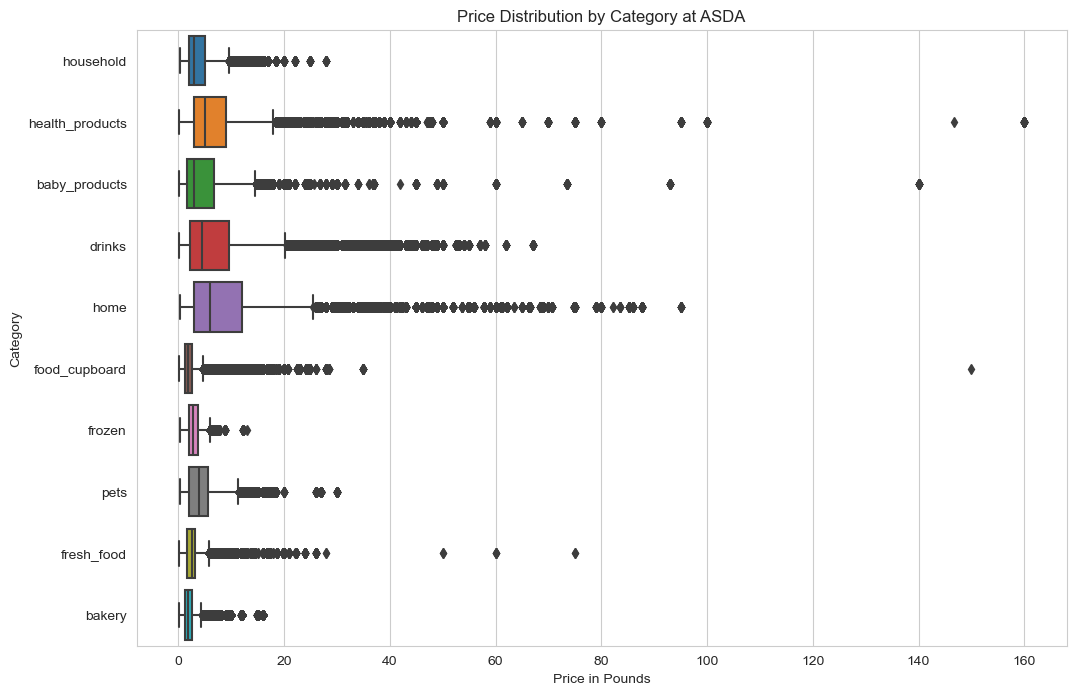

In [19]:
# Analyze the price distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='prices_pounds', 
            y='category', 
            data=df_tesco)
plt.title('Price Distribution by Category at ASDA')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
#plt.xticks(rotation=45)
plt.show()

### Outliers: 
There are outliers in several categories, including `baby_products`, `drinks`, `health_products`, and `home`. These outliers represent prices that are significantly higher or lower than the rest of the data points in their respective categories.

### Pie chart for proportion of prices contributed by each product category

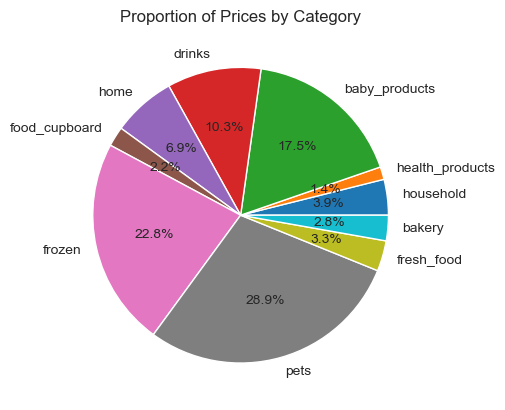

In [20]:
# Pie chart
plt.pie(df_tesco.groupby("category")["prices_pounds"].sum(), 
        labels = df_tesco["category"].unique(), 
        autopct = '%1.1f%%')

plt.title("Proportion of Prices by Category")

plt.show()

### From the pie chart -
* `baby_prodycts` and `drinks` have the highest number of products within the `Tesco` supermarket with a total of 28.3% and 22.8%

## Tesco Own Brand items count

In [21]:
tesco_ownBrand_value = df_tesco['own_brand'].value_counts()
print("\nNumber of items owned by Tesco and not owned by Tesco:\n{}".format(tesco_ownBrand_value))


Number of items owned by Tesco and not owned by Tesco:
own_brand
False    861022
True     297594
Name: count, dtype: int64


## Average Price Comparison: Own Brand vs. Non-Own Brand

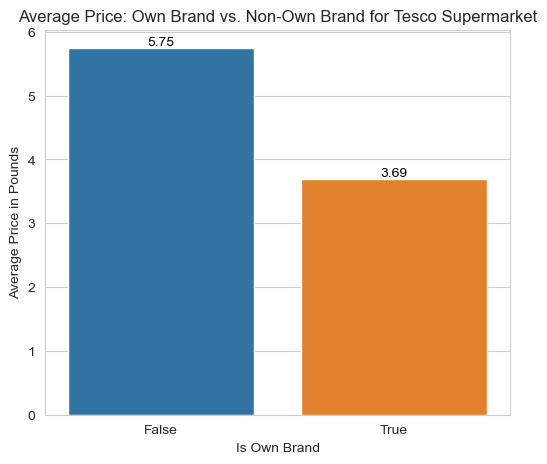

In [22]:
own_brand_prices_tesco = df_tesco.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x = 'own_brand', 
            y = 'prices_pounds', 
            data=own_brand_prices_tesco)

plt.title('Average Price: Own Brand vs. Non-Own Brand for Tesco Supermarket')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')

# Displaying values on top of bars with a little gap
for index, row in own_brand_prices_tesco.iterrows():
    plt.text(index, row['prices_pounds'] + 0.05, round(row['prices_pounds'], 2), 
             color = 'black', 
             ha = "center")

plt.show()

# Correlation Matrix

In [23]:
# Extract only the 'date' column and 'prices_pounds' column
df_tesco_corr = df_tesco[['date', 'prices_pounds']]

# Compute correlation matrix
correlation_matrix_tesco = df_tesco_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix_tesco)

Correlation Matrix:
                   date  prices_pounds
date           1.000000       0.001729
prices_pounds  0.001729       1.000000


### Observations - 
* Based on the correlation coefficient, there is no meaningful linear relationship between the `date` and `prices_pounds` columns. In other words, the date of the observation does not have a significant impact on the prices in pounds.
* It's important to note that correlation coefficients only measure linear relationships, so there could still be other types of relationships (**nonlinear or time-dependent relationships**) that are not captured by this analysis.

## Different values present within `category`

In [24]:
tesco_category_value = df_tesco['category'].value_counts()
print("\nThe different values in category:\n{}".format(tesco_category_value))


The different values in category:
category
food_cupboard      283787
health_products    196650
home               185941
fresh_food         151858
drinks             138885
household           48752
frozen              43845
baby_products       43818
pets                34973
bakery              30107
Name: count, dtype: int64


# Re-categorizing

## For `drinks`

In [25]:
keywords_drinks = {
    'hot_beverages': ['hot', 'chocolate', 'coffee', 'cappuccino', 'espresso', 'tea', 'chai', 'cocoa'],
    
    'cold_beverages': ['water', 'soda', 'juice', 'iced', 'drink', 'cordial', 'smoothie', 'energy drink', 
                       'sugar', 'Coca-Cola', 'Diet Coke'],
    
    'alcoholic_beverages': ['wine', 'prosecco', 'sauvignon', 'malbec', 'cava', 'beer', 'cider', 
                            'stout', 'ale', 'lager'],
    
    'non_alcoholic_beverages': ['soft', 'non', 'alcoholic', 'kombucha', 'health'],
    
    'coffee_and_tea_related': ['coffee', 'beans', 'pods', 'ground', 'tea', 'bags', 'herbal']
}

# Ensure 'names' column is always treated as string
df_tesco['names'] = df_tesco['names'].astype(str)

# Function to assign drinks subcategory based on keywords using NLTK
def assign_drinks_subcategory_nltk(name):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Check tokens against keywords
    for category, kw_list in keywords_drinks.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_drinks'

# Apply the function to rows in the 'drinks' category
df_tesco.loc[df_tesco['category'] == 'drinks', 'category'] = df_tesco[df_tesco['category'] == 'drinks']['names'].apply(assign_drinks_subcategory_nltk)

# Save the updated DataFrame
df_tesco.to_csv('datasets/updated_data/updated_All_Data_Tesco.csv', index=False)

In [26]:
keywords_food_cupboard = {
    'breakfast_items': [
        'easter eggs', 'cereals', 'cereal bars', 'biscuits', 'crackers', 
        'coffee', 'tea', 'hot chocolate', 'jams', 'spreads', 'desserts', 
        'marmalade', 'honey', 'nutella', 'porridge', 'granola', 'oats',
        'peanut butter', 'chocolate spread', 'fruit preserves', 'scone', 'pancake', 
        'waffle mix', 'maple syrup', 'breakfast biscuits', 'toaster pastries'
    ],
    'cooking_essentials': [
        'rice', 'pasta', 'noodles', 'noodle pots', 'instant snacks', 
        'cooking sauces', 'meal kits', 'sides', 'lasagne', 'spaghetti', 
        'macaroni', 'risotto', 'curry', 'stir fry', 'soup', 'broth',
        'gnocchi', 'couscous', 'quinoa', 'bulgur', 'teriyaki sauce', 'salsa',
        'pesto', 'alfredo sauce', 'bolognese sauce', 'chili sauce', 'taco seasoning', 
        'fajita seasoning', 'pad thai', 'ramen', 'udon', 'soba', 'savoury rice', 
        'cous cous', 'packet soup', 'packet noodles'
    ],
    'pantry_staples': [
        'tinned food', 'condiments', 'cooking ingredients', 'home baking', 
        'under 100 calories food cupboard', 'flour', 'sugar', 'yeast', 
        'baking powder', 'vanilla extract', 'cocoa powder', 'vinegar', 
        'oil', 'seasonings', 'spices', 'herbs', 'beans', 'lentils',
        'mustard', 'ketchup', 'mayonnaise', 'relish', 'pickles', 'olives', 
        'capers', 'artichoke hearts', 'sun-dried tomatoes', 'chickpeas', 
        'split peas', 'almond flour', 'coconut flour', 'cake mix', 
        'icing sugar', 'chocolate chips', 'marzipan', 'fondant', 'nut butters', 
        'curds', 'extra special jams', 'custard', 'meringues', 'pudding pots', 
        'tinned fruit', 'dessert mixes', 'sponge pudding', 'ice cream cones', 
        'ice pops','baking nuts', 'seeds', 'baking fruit', 'syrup', 'treacle', 
        'chocolate chips', 'inclusions', 'cake decorations', 'baking kits', 
        'dairy free baking ingredients','extra special baking ingredients'
    ]
}

df_tesco['names'] = df_tesco['names'].astype(str)

# Function to assign food cupboard subcategory based on keywords using NLTK
def assign_food_cupboard_subcategory_nltk(name):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    # Check tokens against keywords
    for category, kw_list in keywords_food_cupboard.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_food_cupboard'

# Apply the function to rows in the 'food_cupboard' category
df_tesco.loc[df_tesco['category'] == 'food_cupboard', 'category'] = df_tesco[df_tesco['category'] == 'food_cupboard']['names'].apply(assign_food_cupboard_subcategory_nltk)

# Save the updated DataFrame
df_tesco.to_csv('datasets/updated_data/updated_All_Data_Tesco.csv', index=False)

In [27]:
fresh_food_keywords = {
    'fruits': [
    'apple', 'pear', 'banana', 'grape', 'berry', 'cherry', 'orange', 'lemon', 'lime',
    'grapefruit', 'melon', 'pineapple', 'mango', 'kiwi', 'peach', 'plum', 'nectarine',
    'fruit pot', 'snack pack', 'organic', 'sweetclems', 'papaya', 'pomegranate',
    'physalis', 'cherry', 'raspberry', 'strawberry', 'blueberry', 'avocado', 
    'pomegranate', 'watermelon', 'honeydew', 'galia', 'coconut', 'dragon fruit', 
    'kiwis', 'seedless grapes', 'sweetclems', 'conference pears', 'banana chips',
    'dried mango', 'blackberries', 'pineapple lolly', 'mango chunks', 'tart plums',
    'red grapefruit', 'sweet plums', 'loose lime', 'crisp apple slices', 'juniper berries'
    ],
    'vegetables': [
    'potato', 'carrot', 'broccoli', 'brussels sprout', 'plantain', 'sweetcorn', 'courgette',
    'aubergine', 'leek', 'mushroom', 'cabbage', 'kale', 'beetroot', 'parsnip', 'garlic',
    'onion', 'spinach', 'tomato', 'pepper', 'asparagus', 'chilli', 'ginger', 'butternut squash',
    'pak choi', 'swede', 'celeriac', 'turnip', 'sweet potato', 'cherry tomato', 'fine bean',
    'baby corn', 'maris piper', 'red onion', 'cauliflower', 'chestnut mushroom', 'curly kale', 
    'cavolo nero', 'tenderstem broccoli', 'mangetout', 'savoy', 'spring green', 'red cabbage',
    'white cabbage', 'white potato', 'baking potato', 'trimmed leek', 'baby potato','roast potatoes', 
    'mash', 'peeled potatoes', 'rosti', 'cheesy mash', 'root veg mash','king edward', 'bunched beetroot', 
    'fluffy', 'creamy', 'smooth', 'crisp', 'golden', 'versatile','flavoursome', 'savoury'
    ],
    'meat_poultry_fish': [
    'pork', 'lamb', 'beef', 'chicken', 'gammon', 'fillets', 'breast', 'leg', 'roasting', 
    'joint', 'tender', 'succulent', 'unsmoked', 'smoked', 'breaded', 'mini', 'salami',
    'cheese', 'cooked', 'goujons', 'sausages', 'chipolatas', 'wiltshire', 'hand', 
    'bavarian', 'style', 'corned', 'honey', 'roast', 'turkey', 'cured', 'loin', 'stir-fry', 
    'stuffed', 'thigh', 'back', 'bacon', 'rashers', 'steak', 'mince', 'lean', 'less', 'fat',
    'seafood', 'fish', 'basa', 'sharing', 'selection', 'continental', 'german', 
    'herby', 'stuffing', 'chargrill', 'extra', 'tasty', 'sliced', 'lunch', 'tongue', 
    'oven', 'baked', 'dry', 'stir-fry', 'classic', 'sage', 'onion', 
    'cold', 'water', 'prawns', 'haddock', 'fishcakes', 'melting', 'cheddar', 'hollandaise', 
    'king', 'prawn', 'masala', 'beer', 'battered', 'sea', 'bass', 'seafood', 'sticks', 
    'mussels', 'honey', 'roasted', 'mackerel', 'whole', 'basa', 'kipper', 'garlic', 'butter', 
    'surimi', 'royale', 'chunks', 'hot', 'spicy', 'sweetcure', 'kiln', 'boneless', 'lemon', 
    'parsley', 'herrings', 'onions', 'salmon', 'side', 'sea', 'smoked', 'salted', 'saltfish', 
    'thai', 'infused', 'vintage', 'leek', 'zesty', 'hake', 'chilli', 'lime', 'lightly', 
    'coated', 'cod', 'loin', 'flaky', 'terrine', 'reduced', 'fat', 'cocktail', 'sweet', 
    'chilli', 'peeled', 'breadcrumb', 'oak', 'pepper', 'superior', 'wafer', 'thin', 'approx', 
    'slices', 'snack', 'bites', 'german', 'pepperoni', 'peperami', 'original', 'minis', 
    'chorizo', 'casero', 'pate', 'snacking', 'hot', 'dogs', 'vegan', 'alternatives', 'Yogurt'
    ],

}
df_tesco['names'] = df_tesco['names'].astype(str)

# Function to assign fresh food subcategory based on keywords using NLTK
def assign_fresh_food_subcategory_nltk(name, stop_words_set):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Check tokens against keywords
    for category, kw_list in fresh_food_keywords.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_fresh_food'

# Prepare the stopwords set
stop_words_set = set(stopwords.words('english'))

# Apply the function to rows in the 'fresh_food' category
df_tesco.loc[df_tesco['category'] == 'fresh_food', 'category'] = df_tesco[df_tesco['category'] == 'fresh_food']['names'].apply(lambda x: assign_fresh_food_subcategory_nltk(x, stop_words_set))

# Save the updated DataFrame
df_tesco.to_csv('datasets/updated_data/updated_All_Data_Tesco.csv', index=False)

In [28]:
# Define keywords for the household subcategories
keywords_household = {
    'cleaning_supplies': [
        'cleaner', 'detergent', 'disinfectant', 'bleach', 'wipes', 'wash', 'soap dish', 
        'laundry', 'dispenser', 'fabric', 'tissues', 'cloth', 'softener', 'tissue', 'mat', 
        'freshener', 'cleaning', 'toilet', 'bin', 'air fresheners', 'home fragrance', 
        'eco-friendly', 'refills', 'batteries', 'light bulbs', 'DIY', 'car care', 
        'laundry detergent', 'fabric softener', 'toilet roll', 'tissues'
    ],
    'personal_care': [
        'shampoo', 'soap', 'toothpaste', 'conditioner', 'deodorant', 'comb', 'hairbrush', 
        'beauty', 'hair', 'intimate', 'bath', 'towel', 'hair dye', 'styling', 'bath', 'shower', 
        'soap', 'dental care', 'skin care', 'women’s toiletries', 'men’s toiletries', 
        'deodorants', 'body sprays', 'bladder weakness', 'period products', 'make up', 'nails', 
        'vegan beauty', 'sun care', 'travel', 'toiletries deals', 'gifting', 'pamper night', 
        'beauty electricals'
    ],
    'kitchen_essentials': [
        'bowls', 'plates', 'spoons', 'utensils', 'pan', 'dinner', 'bowl', 'spoon', 'plate', 
        'blender', 'toaster', 'straws', 'kitchen', 'stainless', 'tray', 'kettle', 'jug', 'dish', 
        'serving', 'chopping', 'bottle', 'water', 'storage', 'casserole', 'kitchen roll'
    ]
}

df_tesco['names'] = df_tesco['names'].astype(str)

# Function to assign household subcategory based on keywords using NLTK
def assign_household_subcategory_nltk(name, stop_words_set):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Check tokens against keywords
    for category, kw_list in keywords_household.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_household'

# Prepare the stopwords set
stop_words_set = set(stopwords.words('english'))

# Apply the function to rows in the 'household' category
df_tesco.loc[df_tesco['category'] == 'household', 'category'] = df_tesco[df_tesco['category'] == 'household']['names'].apply(lambda x: assign_household_subcategory_nltk(x, stop_words_set))

# Save the updated DataFrame
df_tesco.to_csv('datasets/updated_data/updated_All_Data_Tesco.csv', index=False)

In [29]:
keywords_home_entertainment = {
    'garden_outdoor': [
        'garden furniture', 'BBQ', 'plant', 'flower', 'outdoor lighting', 
        'garden tools', 'lawn care', 'pest control', 'seeds', 'fertilizer'
    ],
    'bed_bath_home': [
        'bedding', 'towels', 'bath mat', 'shower curtain', 'pillow', 
        'duvet', 'bedspread', 'bathroom accessories', 'storage solutions'
    ],
    'music_film_games_books': [
        'DVD', 'Blu-ray', 'CD', 'vinyl records', 'video games', 
        'book', 'magazine', 'e-book reader', 'audio book','action figures', 'dolls', 
        'lego', 'board games', 'puzzle', 'outdoor toys', 'educational toys', 
        'video game console', 'remote control cars', 'notebook', 'pen', 
        'pencil', 'marker', 'stamps','envelopes', 'magazines', 'planner', 'calendar'
    ],
    'technology_electricals': [
        'laptop', 'tablet', 'smartphone', 'camera', 'headphones', 
        'speaker', 'TV', 'printer', 'smart home devices','AA batteries', 
        'AAA batteries', 'rechargeable batteries', 
        'LED bulbs', 'halogen bulbs', 'smart bulbs','batteries_light_bulbs'
    ],
    'partyware_gifting': [
        'party decorations', 'gift wrap', 'birthday cards', 'party favors', 
        'balloons', 'candles', 'gift bags', 'greeting cards'
    ],

    'travel_leisure': [
        'suitcase', 'backpack', 'travel accessories', 'camping gear', 
        'sports equipment', 'gym accessories', 'books for travel','tool kit', 'paint', 
        'brushes', 'car shampoo', 'car wax', 'air freshener', 'oil', 'antifreeze', 'screenwash'
    ]
}

df_tesco['names'] = df_tesco['names'].astype(str)

# Function to assign household subcategory based on keywords using NLTK
def assign_home_entertainment_subcategory_nltk(name, stop_words_set):
    # Tokenize the product name and convert to lowercase
    tokens = word_tokenize(name.lower())
    # Filter out stopwords
    tokens = [word for word in tokens if word not in stop_words_set]
    
    # Check tokens against keywords
    for category, kw_list in keywords_home_entertainment.items():
        if any(kw in tokens for kw in kw_list):
            return category
    return 'other_home_entertainment'

# Prepare the stopwords set
stop_words_set = set(stopwords.words('english'))

# Apply the function to rows in the 'household' category
df_tesco.loc[df_tesco['category'] == 'home', 'category'] = df_tesco[df_tesco['category'] == 'home']['names'].apply(lambda x: assign_home_entertainment_subcategory_nltk(x, stop_words_set))

# Save the updated DataFrame
df_tesco.to_csv('datasets/updated_data/updated_All_Data_Tesco.csv', index=False)